In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import numpy as np

In [2]:
df = pd.read_parquet("hf://datasets/CohleM/english-to-nepali/data/train-00000-of-00001-ea91b3ffe2804196.parquet")

/mnt/45b9faff-45f3-43f2-903f-9b92a9a6338c/major-project/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = df.iloc[50000:75001]

In [4]:
df.to_csv("to_analysis.csv", index=False)

In [43]:
print(df.iloc[20,1])

हाल दिनको १२ घण्टा चलाएर यस रोप्वेबाट ६० टन सामान उपत्यकाभित्र ल्याइन्छ


In [56]:
def dataset_overview(df):
    print("Dataset Overview:")
    print(f"Total samples: {len(df)}")
    print(f"Missing Nepali sentences: {df['ne'].isnull().sum()}")
    print(f"Missing English sentences: {df['en'].isnull().sum()}")
    print()

    nepali_lengths = df['ne'].dropna().apply(lambda x: len(x.split()))
    english_lengths = df['en'].dropna().apply(lambda x: len(x.split()))

    print(f"Average Nepali sentence length: {np.mean(nepali_lengths):.2f}")
    print(f"Average English sentence length: {np.mean(english_lengths):.2f}")
    print(f"Max Nepali sentence length: {np.max(nepali_lengths)}")
    print(f"Max English sentence length: {np.max(english_lengths)}")
    print()

    return nepali_lengths, english_lengths

# Token statistics
def token_statistics(df, column, language):
    sentences = df[column].dropna()
    tokens = [word for sentence in sentences for word in sentence.split()]
    token_counts = Counter(tokens)
    print(f"{language} Vocabulary Size: {len(token_counts)}")
    print(f"Most common {language} tokens:")
    for token, count in token_counts.most_common(10):
        print(f"{token}: {count}")
    print()
    return token_counts

# Generate visualizations
def generate_visualizations(nepali_lengths, english_lengths, nepali_tokens, english_tokens):
    # Sentence length distribution
    plt.figure(figsize=(6, 4))
    plt.hist(nepali_lengths, bins=30, alpha=0.7, label='Nepali Sentence Lengths')
    plt.hist(english_lengths, bins=30, alpha=0.7, label='English Sentence Lengths')
    plt.title("Sentence Length Distribution")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Word clouds
    nepali_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(nepali_tokens)
    english_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(english_tokens)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(nepali_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Nepali Word Cloud")

    plt.subplot(1, 2, 2)
    plt.imshow(english_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("English Word Cloud")
    plt.show()

# Identify pairs with high length disparity
def length_disparity_analysis(df):
    df['nepali_length'] = df['ne'].dropna().apply(lambda x: len(x.split()))
    df['english_length'] = df['en'].dropna().apply(lambda x: len(x.split()))
    df['length_difference'] = abs(df['nepali_length'] - df['english_length'])
    large_disparity = df[df['length_difference'] > 10]  # Threshold can be adjusted
    print(f"Sentence pairs with large length disparity: {len(large_disparity)}")
    print(large_disparity[['ne', 'en', 'length_difference']].head())
    print()



In [57]:
# Main
nepali_lengths, english_lengths = dataset_overview(df)


Dataset Overview:
Total samples: 50000
Missing Nepali sentences: 0
Missing English sentences: 0

Average Nepali sentence length: 21.44
Average English sentence length: 24.28
Max Nepali sentence length: 196
Max English sentence length: 203



In [58]:
nepali_tokens = token_statistics(df, 'ne', 'Nepali')
english_tokens = token_statistics(df, 'en', 'English')

Nepali Vocabulary Size: 102152
Most common Nepali tokens:
र: 17845
अनि: 13275
तथा: 7341
पनि: 6890
म: 6724
छ: 5737
गर्न: 5454
तर: 5346
गर्ने: 4613
त्यो: 4598

English Vocabulary Size: 55410
Most common English tokens:
the: 85391
of: 55351
and: 52883
to: 34592
in: 24184
be: 15552
will: 14338
for: 11800
a: 11791
is: 10104



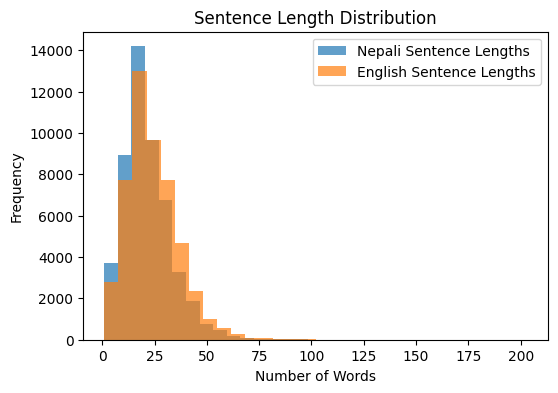

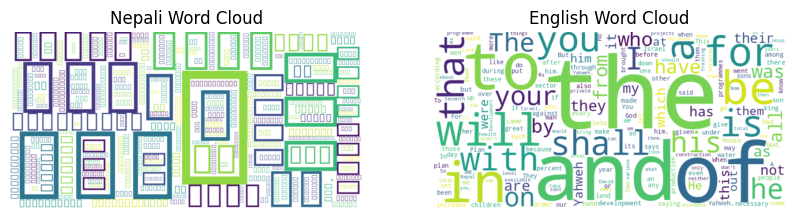

In [59]:
generate_visualizations(nepali_lengths, english_lengths, nepali_tokens, english_tokens)

In [60]:
length_disparity_analysis(df)

Sentence pairs with large length disparity: 7381
                                                   ne  \
3   निजलाई सहायता दिन केन्द्रीय सरकारबाट नियुक्त भ...   
11  जसबाट बर्षेनै सालाखाला १०,४०० मन मात्र उन्नत ब...   
12  अनाज तथा गाइंबस्तुको संरक्षण अनाज तथा गाईबस्तु...   
16  सदासर्वदा हिउंले ढाकिने हिमालय पर्वत र घनाजंगल...   
17  यस पञ्चबर्षीय अवधिभित्र हाल भइरहेको जगदीशपुर र...   

                                                   en  length_difference  
3   In districts where development is more intensi...                 14  
11  For agricultural production in Nepal can ultim...                 22  
12  Plant and Animal Protection: entomology and pl...                 14  
16  Tributaries from the mountainous north join to...                 15  
17  It is intended under the Five-Year Plan to rec...                 16  



In [61]:
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer

In [62]:


# Character-level analysis
def character_analysis(df):
    print("Character-Level Analysis:")
    nepali_char_counts = df['ne'].dropna().apply(len)
    english_char_counts = df['en'].dropna().apply(len)

    print(f"Average Nepali sentence character count: {nepali_char_counts.mean():.2f}")
    print(f"Average English sentence character count: {english_char_counts.mean():.2f}")
    print()

    # Frequency of unique characters
    nepali_chars = ''.join(df['ne'].dropna())
    english_chars = ''.join(df['en'].dropna())
    
    nepali_char_freq = Counter(nepali_chars)
    english_char_freq = Counter(english_chars)

    print("Most Common Characters in Nepali:")
    print(nepali_char_freq.most_common(10))
    print("\nMost Common Characters in English:")
    print(english_char_freq.most_common(10))
    print()

# N-gram analysis
def ngram_analysis(df, column, language, n=2):
    sentences = df[column].dropna()
    vectorizer = CountVectorizer(ngram_range=(n, n), token_pattern=r'\b\w+\b')
    ngrams = vectorizer.fit_transform(sentences)
    ngram_counts = zip(vectorizer.get_feature_names_out(), ngrams.sum(axis=0).tolist()[0])
    sorted_ngrams = sorted(ngram_counts, key=lambda x: x[1], reverse=True)

    print(f"Most Common {n}-grams in {language}:")
    for ngram, count in sorted_ngrams[:10]:
        print(f"{ngram}: {count}")
    print()

# Correlation analysis
def length_correlation(df, nepali_lengths, english_lengths):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=nepali_lengths, y=english_lengths, alpha=0.5)
    plt.title("Correlation of Sentence Lengths (Nepali vs English)")
    plt.xlabel("Nepali Sentence Length (words)")
    plt.ylabel("English Sentence Length (words)")
    plt.show()

    correlation = np.corrcoef(nepali_lengths, english_lengths)[0, 1]
    print(f"Correlation coefficient between Nepali and English sentence lengths: {correlation:.2f}")
    print()

# Detect duplicate pairs
def detect_duplicates(df):
    duplicate_pairs = df[df.duplicated(['ne', 'en'], keep=False)]
    print(f"Number of duplicate sentence pairs: {len(duplicate_pairs)}")
    print(duplicate_pairs.head())
    print()

# Translation directionality analysis
def translation_directionality(df):
    df['nepali_length'] = df['ne'].dropna().apply(lambda x: len(x.split()))
    df['english_length'] = df['en'].dropna().apply(lambda x: len(x.split()))
    nepali_longer = len(df[df['nepali_length'] > df['english_length']])
    english_longer = len(df[df['english_length'] > df['nepali_length']])

    print(f"Sentence pairs where Nepali is longer: {nepali_longer}")
    print(f"Sentence pairs where English is longer: {english_longer}")
    print(f"Ratio (Nepali longer : English longer): {nepali_longer / english_longer:.2f}")
    print()

# Heatmap of bigram frequencies
def bigram_heatmap(df, column, language):
    sentences = df[column].dropna()
    vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b')
    bigrams = vectorizer.fit_transform(sentences).toarray()
    bigram_names = vectorizer.get_feature_names_out()
    bigram_counts = bigrams.sum(axis=0)

    # Convert to a DataFrame for visualization
    bigram_df = pd.DataFrame({'bigram': bigram_names, 'count': bigram_counts})
    bigram_df = bigram_df.sort_values(by='count', ascending=False).head(20)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(data=bigram_df, x='count', y='bigram')
    plt.title(f"Top 20 Bigram Frequencies in {language}")
    plt.xlabel("Frequency")
    plt.ylabel(f"{language} Bigrams")
    plt.show()




In [63]:
# Main for additional insights
character_analysis(df)

Character-Level Analysis:
Average Nepali sentence character count: 143.06
Average English sentence character count: 138.87

Most Common Characters in Nepali:
[(' ', 1028133), ('ा', 558318), ('र', 467467), ('्', 456153), ('न', 369720), ('ि', 295489), ('क', 275801), ('म', 234280), ('े', 221183), ('त', 218103)]

Most Common Characters in English:
[(' ', 1164294), ('e', 686715), ('t', 474332), ('a', 436135), ('o', 431763), ('n', 383271), ('i', 382887), ('h', 331644), ('r', 328978), ('s', 324722)]



In [65]:
ngram_analysis(df, 'ne', 'Nepali', n=5)

Most Common 5-grams in Nepali:
म न सहर ल ई: 2439
त न हर ल ई: 2391
त म हर ल ई: 1754
ह न ह न छ: 1242
सञ च लन गर न: 916
ल त न हर ल: 823
स व स थ य: 805
न र म ण गर: 782
गर न ह न छ: 706
भन न ह न छ: 674



In [66]:
ngram_analysis(df, 'en', 'English', n=5)

Most Common 5-grams in English:
of the children of israel: 155
during the seventh plan period: 152
by the end of the: 131
thus says the lord yahweh: 129
yahweh the god of israel: 118
out of the land of: 100
the word of yahweh came: 100
of the land of egypt: 89
in the midst of the: 88
word of yahweh came to: 87



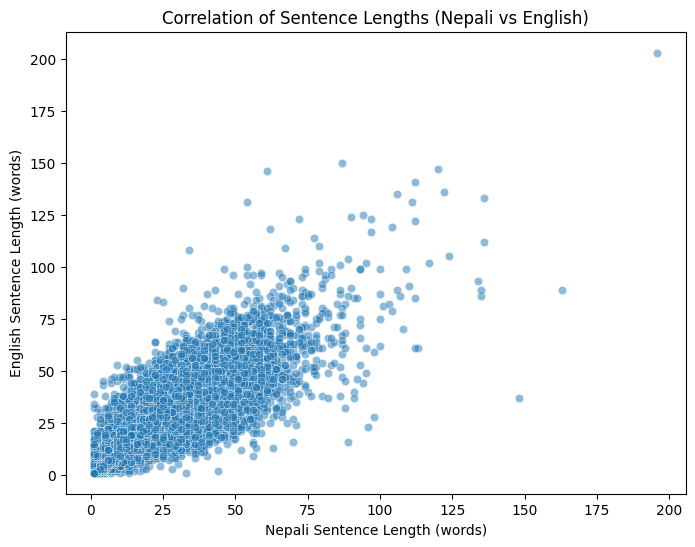

Correlation coefficient between Nepali and English sentence lengths: 0.82



In [25]:
length_correlation(df, nepali_lengths, english_lengths)

In [26]:
detect_duplicates(df)

Number of duplicate sentence pairs: 317
                            en                         ne  nepali_length  \
148   Three Year Plan Progress  त्रिवर्षीय योजनाको प्रगति              3   
211                     Health                  स्वास्थ्य              1   
980           Progress to Date           हालसम्मको प्रगति              2   
1121                Third Plan               तेश्रो योजना              2   
1157                Third Plan               तेश्रो योजना              2   

      english_length  length_difference  
148                4                  1  
211                1                  0  
980                3                  1  
1121               2                  0  
1157               2                  0  



In [27]:
translation_directionality(df)

Sentence pairs where Nepali is longer: 13557
Sentence pairs where English is longer: 32655
Ratio (Nepali longer : English longer): 0.42



In [29]:
# bigram_heatmap(df, 'ne', 'Nepali')

In [ ]:
# bigram_heatmap(df, 'en', 'English')